In [1]:
import numpy as np 
import pandas as pd 
import glob
import os
import PIL
import cv2
import tensorflow as tf
import pathlib 
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
import gdown

In [108]:
file_path = "test.zip"
output = file_path
gdown.download("https://drive.google.com/uc?id=1JPgasvr1db3boCrnuSDRzXCXbbhptQ0h", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

gdown.download("https://drive.google.com/uc?id=1o1aX8fPCUFL8r6B-jsQtsbIUyuLc8Cge", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

gdown.download("https://drive.google.com/uc?id=1agaBydG4SR_HiUisGQBv7k8PkmUTHW61", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

Downloading...
From: https://drive.google.com/uc?id=1JPgasvr1db3boCrnuSDRzXCXbbhptQ0h
To: C:\Users\Nicho\OneDrive\Desktop\UNI\MAGISTRALE\Visione Artificiale\FER-and-GR-Project\test.zip
100%|██████████| 13.7M/13.7M [00:03<00:00, 4.41MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o1aX8fPCUFL8r6B-jsQtsbIUyuLc8Cge
To: C:\Users\Nicho\OneDrive\Desktop\UNI\MAGISTRALE\Visione Artificiale\FER-and-GR-Project\test.zip
100%|██████████| 173M/173M [00:40<00:00, 4.28MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1agaBydG4SR_HiUisGQBv7k8PkmUTHW61
To: C:\Users\Nicho\OneDrive\Desktop\UNI\MAGISTRALE\Visione Artificiale\FER-and-GR-Project\test.zip
100%|██████████| 461M/461M [01:45<00:00, 4.37MB/s] 


In [15]:
db_path = "Gender Recognition Images/"
batch_size = 256
num_classes = 2
img_height = 180
img_width = 180

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.25,
                                                               subset="training",
                                                               seed=123456,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.25,
                                                               subset="validation",
                                                               seed=123456,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)


Found 27167 files belonging to 2 classes.
Using 20376 files for training.
Found 27167 files belonging to 2 classes.
Using 6791 files for validation.


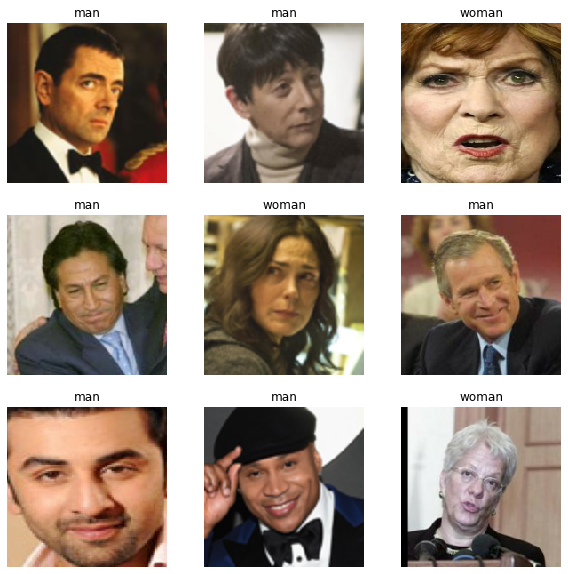

In [17]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off");

In [67]:
# Build the Model

model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(256, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(512, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(256, activation='relu'),
                  layers.Dropout(0.2),  
                  layers.Dense(128, activation = 'relu'),
                  layers.Dense(num_classes, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  mode='min',
                                                  restore_best_weights=True
                                                 )

filepath = 'model_3.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      monitor="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      mode="min",
                                                      save_freq="epoch",
                                                    )

In [48]:
# Train the model

epochs = 20
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs, batch_size = 128, 
                    verbose = 1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
80/80 [==============================] - 46s 515ms/step - loss: 0.0575 - accuracy: 0.9793 - val_loss: 0.0577 - val_accuracy: 0.9812
Epoch 2/20
80/80 [==============================] - 38s 469ms/step - loss: 0.0451 - accuracy: 0.9848 - val_loss: 0.0557 - val_accuracy: 0.9823
Epoch 3/20
80/80 [==============================] - 38s 469ms/step - loss: 0.0352 - accuracy: 0.9864 - val_loss: 0.0600 - val_accuracy: 0.9817
Epoch 4/20
80/80 [==============================] - 38s 468ms/step - loss: 0.0378 - accuracy: 0.9861 - val_loss: 0.0520 - val_accuracy: 0.9845
Epoch 5/20
80/80 [==============================] - 39s 472ms/step - loss: 0.0310 - accuracy: 0.9890 - val_loss: 0.0572 - val_accuracy: 0.9837
Epoch 6/20
80/80 [==============================] - 39s 471ms/step - loss: 0.0293 - accuracy: 0.9894 - val_loss: 0.0559 - val_accuracy: 0.9842
Epoch 7/20
80/80 [==============================] - 38s 470ms/step - loss: 0.0249 - accuracy: 0.9912 - val_loss: 0.0550 - val_accuracy: 0.9842

In [49]:
model1_acc = model.evaluate(val_ds)[1]
model1_acc

27/27 [==============================] - 7s 220ms/step - loss: 0.0520 - accuracy: 0.9845


0.9845383763313293

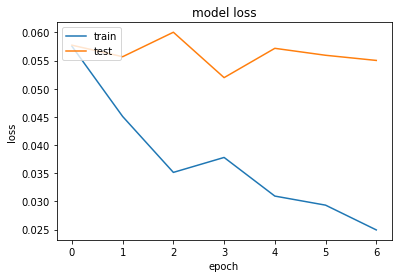

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

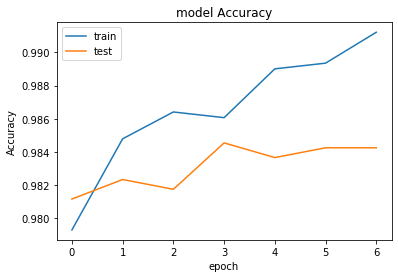

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
# Save the Model

model.save('Gender Model/')

INFO:tensorflow:Assets written to: Gender Model/assets


In [11]:
#Load the Model

model = keras.models.load_model('Gender Model/')

In [19]:
# Load and Predict an image

img = image.load_img("Emotions Test Set/49.png", target_size=(180,180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(class_names[np.where(classes > 0.5, 1,0)[0][1]])

man


In [21]:
cap = cv2.VideoCapture(0)

if (cap.isOpened() == False): 
    print("Unable to read camera feed")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

#out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
 
while(True):
    ret, frame = cap.read()

    if ret == True: 
        #out.write(frame)
        cv2.imshow('frame',frame)
        resized = cv2.resize(frame, (180,180))
        x = image.img_to_array(resized)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images)
        print(class_names[np.where(classes > 0.5, 1,0)[0][1]])
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break 

cap.release()
#out.release()
 
# Closes all the frames
cv2.destroyAllWindows()

man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man
man


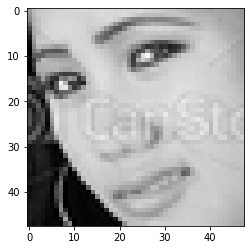

In [3]:
i = cv2.imread("/Users/Nicho/OneDrive/Desktop/UNI/MAGISTRALE/Visione Artificiale/FER-and-GR-Project/Emotions Test Set/1.png")
plt.imshow(i)
cv2.imshow("test", i)